In [1]:
import numpy as np
from pandas import DataFrame
import keras

Using TensorFlow backend.


In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook

# Récupération et mise en forme des données

In [2]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [3]:
X.shape

(2062, 64, 64)

In [4]:
X_flat = np.array(X).reshape((2062, 64*64))
X_flat.shape

(2062, 4096)

In [5]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf.head()

,9,8,7,6,5,4,3,2,1,0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
Ydf = Ydf[[x for x in range(10)]]
Ydf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
Ydf['class']=(Ydf[range(10)].idxmax(axis=1)).astype('int')
Ydf[['class']]

,class
0,9
1,9
2,9
3,9
4,9
...,...
2057,0
2058,0
2059,0
2060,0


In [8]:
Y_flat = Ydf['class'].to_numpy()
Y_flat.shape

(2062,)

In [9]:
Y_flat = Y_flat.reshape(-1,1)
Y_flat.shape

(2062, 1)

In [10]:
from numpy import random as np_random

SEED = 42
np_random.seed(SEED)

In [12]:
LEARNING_RATE = 0.001
EPOCHS = 500

# Model Keras Application :

In [23]:
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout #create model
from keras.optimizers import Adam, Nadam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
import pandas as pd
from sklearn.model_selection import train_test_split

## Transfert learning avec predict

In [16]:
X_prepared_tl = np.stack((X,X,X), axis=3)
X_prepared_tl.shape

(2062, 64, 64, 3)

In [17]:
def tl_features(app_keras):
    model = app_keras(include_top=False, 
                            weights='imagenet', 
                            input_shape=(64,64,3), 
                            pooling=max)
    features = model.predict(X_prepared_tl)
    features = features.reshape(features.shape[0],
                                (features.shape[1]*features.shape[2]*features.shape[3]))
    return features

In [18]:
features_vgg16 = tl_features(VGG16)
print(features_vgg16.shape)











(2062, 2048)


In [19]:
features_mobilenet = tl_features(MobileNet)
print(features_mobilenet.shape)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


(2062, 4096)


In [20]:
features_vgg19 = tl_features(VGG19)
print(features_vgg19.shape)

(2062, 2048)


In [24]:
def tl_model(features):
    X_train, X_val, y_train, y_val = train_test_split(features, Y_flat, test_size=0.1)
    
    model = Sequential() #add model layers
    model.add(Dense(32, activation='relu', kernel_initializer='glorot_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu', kernel_initializer='glorot_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=Nadam(lr=LEARNING_RATE), 
                    metrics = ['accuracy'])
    
    history = model.fit(X_train,
                        y_train,
                        validation_data=(X_val, y_val),
                        epochs=EPOCHS,
                        batch_size=X_train.shape[1],
                        verbose=2)
    
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.title('Model performance throughout training CNN')
    plt.ylabel('metrics')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'val_acc', 'train_loss', 'train_acc'], loc='upper right')
    plt.show()
    return model



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1855 samples, validate on 207 samples
Epoch 1/500
 - 1s - loss: 2.3630 - acc: 0.1013 - val_loss: 2.3118 - val_acc: 0.0725
Epoch 2/500
 - 0s - loss: 2.3072 - acc: 0.1035 - val_loss: 2.2845 - val_acc: 0.0725
Epoch 3/500
 - 0s - loss: 2.2777 - acc: 0.1111 - val_loss: 2.2701 - val_acc: 0.0725
Epoch 4/500
 - 0s - loss: 2.2657 - acc: 0.0997 - val_loss: 2.2566 - val_acc: 0.0773
Epoch 5/500
 - 0s - loss: 2.2473 - acc: 0.1229 - val_loss: 2.2359 - val_acc: 0.0725
Epoch 6/500
 - 0s - loss: 2.2433 - acc: 0.1164 - val_loss: 2.2309 - val_acc: 0.0725
Epoch 7/500
 - 0s - loss: 2.2321 - acc: 0.1272 - val_loss: 2.2057 - val_acc: 0.0773
Epoch 8/500
 - 0s - loss: 2.2065 - acc: 0.1407 - val_loss: 2.1897 - val_acc: 0.0725
Epoch 9/500
 - 0s - loss: 2.1916 - acc: 0.1315 - val_loss: 2.1838 -

Epoch 78/500
 - 0s - loss: 1.1510 - acc: 0.6248 - val_loss: 0.9289 - val_acc: 0.8116
Epoch 79/500
 - 0s - loss: 1.1136 - acc: 0.6270 - val_loss: 0.9135 - val_acc: 0.8213
Epoch 80/500
 - 0s - loss: 1.0897 - acc: 0.6491 - val_loss: 0.9025 - val_acc: 0.8068
Epoch 81/500
 - 0s - loss: 1.1065 - acc: 0.6345 - val_loss: 0.8912 - val_acc: 0.8116
Epoch 82/500
 - 0s - loss: 1.1261 - acc: 0.6129 - val_loss: 0.8837 - val_acc: 0.8213
Epoch 83/500
 - 0s - loss: 1.0983 - acc: 0.6329 - val_loss: 0.8761 - val_acc: 0.8116
Epoch 84/500
 - 0s - loss: 1.1143 - acc: 0.6216 - val_loss: 0.8701 - val_acc: 0.8213
Epoch 85/500
 - 0s - loss: 1.0885 - acc: 0.6323 - val_loss: 0.8615 - val_acc: 0.8068
Epoch 86/500
 - 0s - loss: 1.0733 - acc: 0.6383 - val_loss: 0.8557 - val_acc: 0.8213
Epoch 87/500
 - 0s - loss: 1.0913 - acc: 0.6442 - val_loss: 0.8417 - val_acc: 0.8068
Epoch 88/500
 - 0s - loss: 1.0315 - acc: 0.6620 - val_loss: 0.8348 - val_acc: 0.8309
Epoch 89/500
 - 0s - loss: 1.0581 - acc: 0.6453 - val_loss: 0.825

Epoch 174/500
 - 0s - loss: 0.6490 - acc: 0.7822 - val_loss: 0.4455 - val_acc: 0.8696
Epoch 175/500
 - 0s - loss: 0.6578 - acc: 0.7741 - val_loss: 0.4422 - val_acc: 0.8696
Epoch 176/500
 - 0s - loss: 0.6463 - acc: 0.7806 - val_loss: 0.4377 - val_acc: 0.8696
Epoch 177/500
 - 0s - loss: 0.6322 - acc: 0.7757 - val_loss: 0.4364 - val_acc: 0.8744
Epoch 178/500
 - 0s - loss: 0.6182 - acc: 0.7914 - val_loss: 0.4354 - val_acc: 0.8696
Epoch 179/500
 - 0s - loss: 0.6741 - acc: 0.7633 - val_loss: 0.4363 - val_acc: 0.8696
Epoch 180/500
 - 0s - loss: 0.6554 - acc: 0.7811 - val_loss: 0.4395 - val_acc: 0.8551
Epoch 181/500
 - 0s - loss: 0.6476 - acc: 0.7795 - val_loss: 0.4319 - val_acc: 0.8744
Epoch 182/500
 - 0s - loss: 0.5981 - acc: 0.7973 - val_loss: 0.4312 - val_acc: 0.8599
Epoch 183/500
 - 0s - loss: 0.6107 - acc: 0.7854 - val_loss: 0.4233 - val_acc: 0.8744
Epoch 184/500
 - 0s - loss: 0.6239 - acc: 0.7833 - val_loss: 0.4234 - val_acc: 0.8696
Epoch 185/500
 - 0s - loss: 0.5995 - acc: 0.7903 - val

Epoch 270/500
 - 0s - loss: 0.4799 - acc: 0.8270 - val_loss: 0.3198 - val_acc: 0.8986
Epoch 271/500
 - 0s - loss: 0.4763 - acc: 0.8361 - val_loss: 0.3198 - val_acc: 0.9034
Epoch 272/500
 - 0s - loss: 0.4476 - acc: 0.8550 - val_loss: 0.3165 - val_acc: 0.8986
Epoch 273/500
 - 0s - loss: 0.4663 - acc: 0.8350 - val_loss: 0.3172 - val_acc: 0.8986
Epoch 274/500
 - 0s - loss: 0.4354 - acc: 0.8588 - val_loss: 0.3181 - val_acc: 0.8986
Epoch 275/500
 - 0s - loss: 0.4521 - acc: 0.8469 - val_loss: 0.3175 - val_acc: 0.9034
Epoch 276/500
 - 0s - loss: 0.4523 - acc: 0.8507 - val_loss: 0.3201 - val_acc: 0.8937
Epoch 277/500
 - 0s - loss: 0.4504 - acc: 0.8512 - val_loss: 0.3146 - val_acc: 0.9130
Epoch 278/500
 - 0s - loss: 0.4495 - acc: 0.8431 - val_loss: 0.3164 - val_acc: 0.8986
Epoch 279/500
 - 0s - loss: 0.4404 - acc: 0.8458 - val_loss: 0.3148 - val_acc: 0.9034
Epoch 280/500
 - 0s - loss: 0.4607 - acc: 0.8323 - val_loss: 0.3146 - val_acc: 0.9034
Epoch 281/500
 - 0s - loss: 0.4342 - acc: 0.8598 - val

Epoch 366/500
 - 0s - loss: 0.3668 - acc: 0.8739 - val_loss: 0.2694 - val_acc: 0.9227
Epoch 367/500
 - 0s - loss: 0.3834 - acc: 0.8728 - val_loss: 0.2737 - val_acc: 0.9179
Epoch 368/500
 - 0s - loss: 0.3787 - acc: 0.8728 - val_loss: 0.2680 - val_acc: 0.9179
Epoch 369/500
 - 0s - loss: 0.3596 - acc: 0.8776 - val_loss: 0.2749 - val_acc: 0.9179
Epoch 370/500
 - 0s - loss: 0.3547 - acc: 0.8712 - val_loss: 0.2645 - val_acc: 0.9179
Epoch 371/500
 - 0s - loss: 0.3599 - acc: 0.8755 - val_loss: 0.2685 - val_acc: 0.9130
Epoch 372/500
 - 0s - loss: 0.3541 - acc: 0.8765 - val_loss: 0.2666 - val_acc: 0.9179
Epoch 373/500
 - 0s - loss: 0.3477 - acc: 0.8798 - val_loss: 0.2732 - val_acc: 0.9179
Epoch 374/500
 - 0s - loss: 0.3557 - acc: 0.8765 - val_loss: 0.2661 - val_acc: 0.9179
Epoch 375/500
 - 0s - loss: 0.3532 - acc: 0.8792 - val_loss: 0.2770 - val_acc: 0.9179
Epoch 376/500
 - 0s - loss: 0.3857 - acc: 0.8663 - val_loss: 0.2680 - val_acc: 0.9082
Epoch 377/500
 - 0s - loss: 0.3607 - acc: 0.8733 - val

Epoch 462/500
 - 0s - loss: 0.2928 - acc: 0.9035 - val_loss: 0.2447 - val_acc: 0.9179
Epoch 463/500
 - 0s - loss: 0.2944 - acc: 0.9024 - val_loss: 0.2525 - val_acc: 0.9227
Epoch 464/500
 - 0s - loss: 0.2964 - acc: 0.9084 - val_loss: 0.2477 - val_acc: 0.9324
Epoch 465/500
 - 0s - loss: 0.2955 - acc: 0.8943 - val_loss: 0.2508 - val_acc: 0.9227
Epoch 466/500
 - 0s - loss: 0.3012 - acc: 0.9030 - val_loss: 0.2450 - val_acc: 0.9179
Epoch 467/500
 - 0s - loss: 0.3034 - acc: 0.9030 - val_loss: 0.2545 - val_acc: 0.9227
Epoch 468/500
 - 0s - loss: 0.2872 - acc: 0.9073 - val_loss: 0.2444 - val_acc: 0.9275
Epoch 469/500
 - 0s - loss: 0.3003 - acc: 0.9024 - val_loss: 0.2502 - val_acc: 0.9227
Epoch 470/500
 - 0s - loss: 0.3022 - acc: 0.8997 - val_loss: 0.2417 - val_acc: 0.9179
Epoch 471/500
 - 0s - loss: 0.2843 - acc: 0.9084 - val_loss: 0.2530 - val_acc: 0.9227
Epoch 472/500
 - 0s - loss: 0.2950 - acc: 0.9051 - val_loss: 0.2434 - val_acc: 0.9275
Epoch 473/500
 - 0s - loss: 0.3186 - acc: 0.8954 - val

<IPython.core.display.Javascript object>


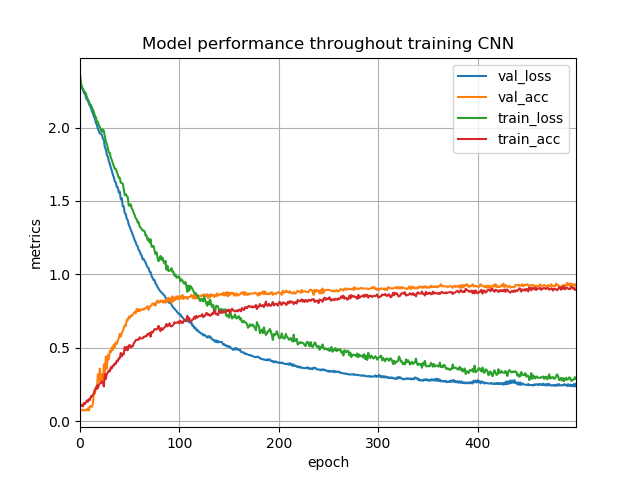

In [25]:
model_vgg16 = tl_model(features_vgg16)

Train on 1855 samples, validate on 207 samples
Epoch 1/500
 - 1s - loss: 2.5409 - acc: 0.1100 - val_loss: 2.2950 - val_acc: 0.1691
Epoch 2/500
 - 0s - loss: 2.3627 - acc: 0.1267 - val_loss: 2.2428 - val_acc: 0.1981
Epoch 3/500
 - 0s - loss: 2.2934 - acc: 0.1439 - val_loss: 2.2231 - val_acc: 0.1787
Epoch 4/500
 - 0s - loss: 2.2689 - acc: 0.1342 - val_loss: 2.2145 - val_acc: 0.2415
Epoch 5/500
 - 0s - loss: 2.2605 - acc: 0.1590 - val_loss: 2.2031 - val_acc: 0.1932
Epoch 6/500
 - 0s - loss: 2.2450 - acc: 0.1563 - val_loss: 2.1897 - val_acc: 0.2415
Epoch 7/500
 - 0s - loss: 2.2306 - acc: 0.1747 - val_loss: 2.1816 - val_acc: 0.2415
Epoch 8/500
 - 0s - loss: 2.2200 - acc: 0.1838 - val_loss: 2.1661 - val_acc: 0.3043
Epoch 9/500
 - 0s - loss: 2.2162 - acc: 0.1747 - val_loss: 2.1720 - val_acc: 0.2464
Epoch 10/500
 - 0s - loss: 2.2040 - acc: 0.2049 - val_loss: 2.1463 - val_acc: 0.2754
Epoch 11/500
 - 0s - loss: 2.1904 - acc: 0.1962 - val_loss: 2.1330 - val_acc: 0.2705
Epoch 12/500
 - 0s - loss: 

Epoch 97/500
 - 0s - loss: 1.2672 - acc: 0.5445 - val_loss: 1.0414 - val_acc: 0.7295
Epoch 98/500
 - 0s - loss: 1.2550 - acc: 0.5747 - val_loss: 0.9948 - val_acc: 0.7585
Epoch 99/500
 - 0s - loss: 1.2454 - acc: 0.5720 - val_loss: 1.0111 - val_acc: 0.7440
Epoch 100/500
 - 0s - loss: 1.2407 - acc: 0.5795 - val_loss: 0.9775 - val_acc: 0.7585
Epoch 101/500
 - 0s - loss: 1.2090 - acc: 0.5871 - val_loss: 0.9903 - val_acc: 0.7585
Epoch 102/500
 - 0s - loss: 1.2434 - acc: 0.5801 - val_loss: 0.9578 - val_acc: 0.7633
Epoch 103/500
 - 0s - loss: 1.2046 - acc: 0.5881 - val_loss: 0.9704 - val_acc: 0.7633
Epoch 104/500
 - 0s - loss: 1.1887 - acc: 0.5989 - val_loss: 0.9473 - val_acc: 0.7729
Epoch 105/500
 - 0s - loss: 1.1936 - acc: 0.6032 - val_loss: 0.9538 - val_acc: 0.7729
Epoch 106/500
 - 0s - loss: 1.2051 - acc: 0.5741 - val_loss: 0.9319 - val_acc: 0.7778
Epoch 107/500
 - 0s - loss: 1.1758 - acc: 0.6027 - val_loss: 0.9357 - val_acc: 0.7633
Epoch 108/500
 - 0s - loss: 1.1656 - acc: 0.5968 - val_lo

Epoch 193/500
 - 0s - loss: 0.7646 - acc: 0.7364 - val_loss: 0.5655 - val_acc: 0.8647
Epoch 194/500
 - 0s - loss: 0.7865 - acc: 0.7353 - val_loss: 0.5540 - val_acc: 0.8696
Epoch 195/500
 - 0s - loss: 0.7644 - acc: 0.7423 - val_loss: 0.5532 - val_acc: 0.8647
Epoch 196/500
 - 0s - loss: 0.7488 - acc: 0.7450 - val_loss: 0.5459 - val_acc: 0.8744
Epoch 197/500
 - 0s - loss: 0.7667 - acc: 0.7310 - val_loss: 0.5472 - val_acc: 0.8599
Epoch 198/500
 - 0s - loss: 0.7442 - acc: 0.7423 - val_loss: 0.5371 - val_acc: 0.8744
Epoch 199/500
 - 0s - loss: 0.7596 - acc: 0.7466 - val_loss: 0.5388 - val_acc: 0.8551
Epoch 200/500
 - 0s - loss: 0.7397 - acc: 0.7504 - val_loss: 0.5307 - val_acc: 0.8792
Epoch 201/500
 - 0s - loss: 0.7087 - acc: 0.7633 - val_loss: 0.5291 - val_acc: 0.8599
Epoch 202/500
 - 0s - loss: 0.7376 - acc: 0.7585 - val_loss: 0.5304 - val_acc: 0.8841
Epoch 203/500
 - 0s - loss: 0.7314 - acc: 0.7402 - val_loss: 0.5278 - val_acc: 0.8599
Epoch 204/500
 - 0s - loss: 0.7466 - acc: 0.7418 - val

Epoch 289/500
 - 0s - loss: 0.4994 - acc: 0.8367 - val_loss: 0.3672 - val_acc: 0.8889
Epoch 290/500
 - 0s - loss: 0.5224 - acc: 0.8237 - val_loss: 0.3642 - val_acc: 0.9082
Epoch 291/500
 - 0s - loss: 0.4798 - acc: 0.8458 - val_loss: 0.3671 - val_acc: 0.8889
Epoch 292/500
 - 0s - loss: 0.5005 - acc: 0.8296 - val_loss: 0.3576 - val_acc: 0.9130
Epoch 293/500
 - 0s - loss: 0.5128 - acc: 0.8259 - val_loss: 0.3615 - val_acc: 0.8937
Epoch 294/500
 - 0s - loss: 0.5174 - acc: 0.8270 - val_loss: 0.3591 - val_acc: 0.9179
Epoch 295/500
 - 0s - loss: 0.5102 - acc: 0.8280 - val_loss: 0.3634 - val_acc: 0.8986
Epoch 296/500
 - 0s - loss: 0.5110 - acc: 0.8323 - val_loss: 0.3538 - val_acc: 0.9082
Epoch 297/500
 - 0s - loss: 0.5197 - acc: 0.8334 - val_loss: 0.3510 - val_acc: 0.9082
Epoch 298/500
 - 0s - loss: 0.4948 - acc: 0.8399 - val_loss: 0.3536 - val_acc: 0.9034
Epoch 299/500
 - 0s - loss: 0.4840 - acc: 0.8496 - val_loss: 0.3493 - val_acc: 0.9034
Epoch 300/500
 - 0s - loss: 0.4897 - acc: 0.8383 - val

Epoch 385/500
 - 0s - loss: 0.3711 - acc: 0.8755 - val_loss: 0.2815 - val_acc: 0.9130
Epoch 386/500
 - 0s - loss: 0.3840 - acc: 0.8819 - val_loss: 0.2809 - val_acc: 0.9082
Epoch 387/500
 - 0s - loss: 0.3822 - acc: 0.8760 - val_loss: 0.2902 - val_acc: 0.9034
Epoch 388/500
 - 0s - loss: 0.3960 - acc: 0.8598 - val_loss: 0.2848 - val_acc: 0.9130
Epoch 389/500
 - 0s - loss: 0.3740 - acc: 0.8776 - val_loss: 0.2904 - val_acc: 0.9034
Epoch 390/500
 - 0s - loss: 0.3771 - acc: 0.8868 - val_loss: 0.2784 - val_acc: 0.9130
Epoch 391/500
 - 0s - loss: 0.3908 - acc: 0.8722 - val_loss: 0.2864 - val_acc: 0.9034
Epoch 392/500
 - 0s - loss: 0.3949 - acc: 0.8652 - val_loss: 0.2788 - val_acc: 0.9179
Epoch 393/500
 - 0s - loss: 0.3812 - acc: 0.8722 - val_loss: 0.2918 - val_acc: 0.8986
Epoch 394/500
 - 0s - loss: 0.3770 - acc: 0.8765 - val_loss: 0.2717 - val_acc: 0.9179
Epoch 395/500
 - 0s - loss: 0.3841 - acc: 0.8744 - val_loss: 0.2754 - val_acc: 0.9130
Epoch 396/500
 - 0s - loss: 0.3712 - acc: 0.8814 - val

Epoch 481/500
 - 0s - loss: 0.3127 - acc: 0.8938 - val_loss: 0.2474 - val_acc: 0.9130
Epoch 482/500
 - 0s - loss: 0.3238 - acc: 0.8938 - val_loss: 0.2540 - val_acc: 0.9082
Epoch 483/500
 - 0s - loss: 0.3273 - acc: 0.8949 - val_loss: 0.2461 - val_acc: 0.9179
Epoch 484/500
 - 0s - loss: 0.3266 - acc: 0.8938 - val_loss: 0.2546 - val_acc: 0.9082
Epoch 485/500
 - 0s - loss: 0.3072 - acc: 0.8970 - val_loss: 0.2472 - val_acc: 0.9130
Epoch 486/500
 - 0s - loss: 0.3457 - acc: 0.8841 - val_loss: 0.2533 - val_acc: 0.9130
Epoch 487/500
 - 0s - loss: 0.3251 - acc: 0.8927 - val_loss: 0.2547 - val_acc: 0.9082
Epoch 488/500
 - 0s - loss: 0.3480 - acc: 0.8792 - val_loss: 0.2495 - val_acc: 0.9324
Epoch 489/500
 - 0s - loss: 0.3375 - acc: 0.8814 - val_loss: 0.2495 - val_acc: 0.9034
Epoch 490/500
 - 0s - loss: 0.3159 - acc: 0.8900 - val_loss: 0.2444 - val_acc: 0.9179
Epoch 491/500
 - 0s - loss: 0.3230 - acc: 0.8873 - val_loss: 0.2405 - val_acc: 0.9227
Epoch 492/500
 - 0s - loss: 0.3052 - acc: 0.9051 - val

<IPython.core.display.Javascript object>


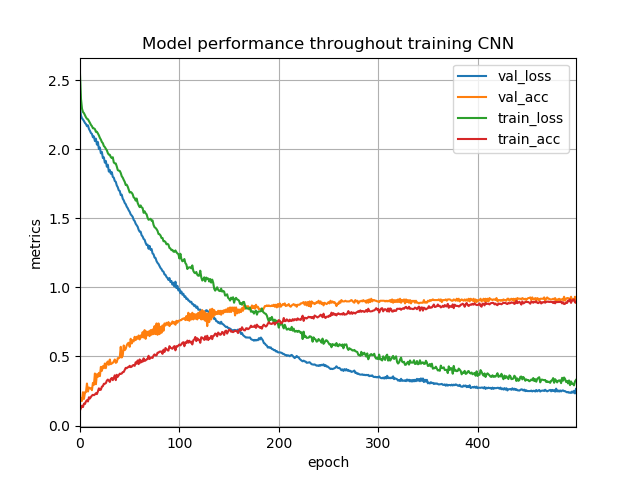

In [26]:
model_vgg19 = tl_model(features_vgg19)

Train on 1855 samples, validate on 207 samples
Epoch 1/500
 - 1s - loss: 3.7161 - acc: 0.0922 - val_loss: 2.4190 - val_acc: 0.1304
Epoch 2/500
 - 0s - loss: 2.6844 - acc: 0.1353 - val_loss: 2.2736 - val_acc: 0.1787
Epoch 3/500
 - 0s - loss: 2.4545 - acc: 0.1364 - val_loss: 2.1675 - val_acc: 0.1981
Epoch 4/500
 - 0s - loss: 2.3276 - acc: 0.1536 - val_loss: 2.0784 - val_acc: 0.2609
Epoch 5/500
 - 0s - loss: 2.2125 - acc: 0.2059 - val_loss: 2.0693 - val_acc: 0.2367
Epoch 6/500
 - 0s - loss: 2.1418 - acc: 0.2221 - val_loss: 1.9458 - val_acc: 0.3092
Epoch 7/500
 - 0s - loss: 2.0594 - acc: 0.2383 - val_loss: 1.9129 - val_acc: 0.3623
Epoch 8/500
 - 0s - loss: 2.0030 - acc: 0.2868 - val_loss: 1.8001 - val_acc: 0.4010
Epoch 9/500
 - 0s - loss: 1.9721 - acc: 0.2943 - val_loss: 1.8946 - val_acc: 0.3575
Epoch 10/500
 - 0s - loss: 1.9728 - acc: 0.2960 - val_loss: 1.7577 - val_acc: 0.4396
Epoch 11/500
 - 0s - loss: 1.8388 - acc: 0.3596 - val_loss: 1.6937 - val_acc: 0.4541
Epoch 12/500
 - 0s - loss: 

Epoch 97/500
 - 0s - loss: 0.6156 - acc: 0.8011 - val_loss: 0.6073 - val_acc: 0.8164
Epoch 98/500
 - 0s - loss: 0.5695 - acc: 0.8092 - val_loss: 0.5713 - val_acc: 0.8357
Epoch 99/500
 - 0s - loss: 0.5832 - acc: 0.8108 - val_loss: 0.5698 - val_acc: 0.8357
Epoch 100/500
 - 0s - loss: 0.5373 - acc: 0.8264 - val_loss: 0.5683 - val_acc: 0.8309
Epoch 101/500
 - 0s - loss: 0.5429 - acc: 0.8307 - val_loss: 0.5634 - val_acc: 0.8357
Epoch 102/500
 - 0s - loss: 0.5335 - acc: 0.8318 - val_loss: 0.5584 - val_acc: 0.8454
Epoch 103/500
 - 0s - loss: 0.5242 - acc: 0.8318 - val_loss: 0.5548 - val_acc: 0.8357
Epoch 104/500
 - 0s - loss: 0.4902 - acc: 0.8507 - val_loss: 0.5374 - val_acc: 0.8406
Epoch 105/500
 - 0s - loss: 0.5466 - acc: 0.8216 - val_loss: 0.5529 - val_acc: 0.8406
Epoch 106/500
 - 0s - loss: 0.4910 - acc: 0.8469 - val_loss: 0.5461 - val_acc: 0.8502
Epoch 107/500
 - 0s - loss: 0.5057 - acc: 0.8350 - val_loss: 0.5405 - val_acc: 0.8357
Epoch 108/500
 - 0s - loss: 0.5119 - acc: 0.8356 - val_lo

Epoch 193/500
 - 0s - loss: 0.2726 - acc: 0.9105 - val_loss: 0.4802 - val_acc: 0.8647
Epoch 194/500
 - 0s - loss: 0.2674 - acc: 0.9175 - val_loss: 0.4976 - val_acc: 0.8599
Epoch 195/500
 - 0s - loss: 0.2673 - acc: 0.9154 - val_loss: 0.4749 - val_acc: 0.8647
Epoch 196/500
 - 0s - loss: 0.2630 - acc: 0.9148 - val_loss: 0.4994 - val_acc: 0.8647
Epoch 197/500
 - 0s - loss: 0.2491 - acc: 0.9213 - val_loss: 0.4912 - val_acc: 0.8696
Epoch 198/500
 - 0s - loss: 0.2506 - acc: 0.9245 - val_loss: 0.4951 - val_acc: 0.8599
Epoch 199/500
 - 0s - loss: 0.2755 - acc: 0.9084 - val_loss: 0.5008 - val_acc: 0.8599
Epoch 200/500
 - 0s - loss: 0.2567 - acc: 0.9218 - val_loss: 0.4939 - val_acc: 0.8647
Epoch 201/500
 - 0s - loss: 0.2587 - acc: 0.9111 - val_loss: 0.4816 - val_acc: 0.8599
Epoch 202/500
 - 0s - loss: 0.2669 - acc: 0.9121 - val_loss: 0.4767 - val_acc: 0.8647
Epoch 203/500
 - 0s - loss: 0.2461 - acc: 0.9181 - val_loss: 0.4815 - val_acc: 0.8647
Epoch 204/500
 - 0s - loss: 0.2422 - acc: 0.9272 - val

Epoch 289/500
 - 0s - loss: 0.1564 - acc: 0.9526 - val_loss: 0.5272 - val_acc: 0.8599
Epoch 290/500
 - 0s - loss: 0.1558 - acc: 0.9504 - val_loss: 0.5508 - val_acc: 0.8502
Epoch 291/500
 - 0s - loss: 0.1777 - acc: 0.9391 - val_loss: 0.5321 - val_acc: 0.8599
Epoch 292/500
 - 0s - loss: 0.1701 - acc: 0.9493 - val_loss: 0.5305 - val_acc: 0.8551
Epoch 293/500
 - 0s - loss: 0.1732 - acc: 0.9472 - val_loss: 0.5431 - val_acc: 0.8599
Epoch 294/500
 - 0s - loss: 0.1483 - acc: 0.9580 - val_loss: 0.5313 - val_acc: 0.8551
Epoch 295/500
 - 0s - loss: 0.1644 - acc: 0.9520 - val_loss: 0.5433 - val_acc: 0.8551
Epoch 296/500
 - 0s - loss: 0.1469 - acc: 0.9580 - val_loss: 0.5205 - val_acc: 0.8647
Epoch 297/500
 - 0s - loss: 0.1631 - acc: 0.9461 - val_loss: 0.5434 - val_acc: 0.8551
Epoch 298/500
 - 0s - loss: 0.1510 - acc: 0.9590 - val_loss: 0.5329 - val_acc: 0.8551
Epoch 299/500
 - 0s - loss: 0.1592 - acc: 0.9509 - val_loss: 0.5267 - val_acc: 0.8599
Epoch 300/500
 - 0s - loss: 0.1676 - acc: 0.9477 - val

Epoch 385/500
 - 0s - loss: 0.1134 - acc: 0.9639 - val_loss: 0.5423 - val_acc: 0.8647
Epoch 386/500
 - 0s - loss: 0.1105 - acc: 0.9666 - val_loss: 0.5611 - val_acc: 0.8599
Epoch 387/500
 - 0s - loss: 0.1133 - acc: 0.9617 - val_loss: 0.5507 - val_acc: 0.8551
Epoch 388/500
 - 0s - loss: 0.1260 - acc: 0.9590 - val_loss: 0.5500 - val_acc: 0.8647
Epoch 389/500
 - 0s - loss: 0.1183 - acc: 0.9628 - val_loss: 0.5449 - val_acc: 0.8647
Epoch 390/500
 - 0s - loss: 0.1060 - acc: 0.9714 - val_loss: 0.5520 - val_acc: 0.8599
Epoch 391/500
 - 0s - loss: 0.1146 - acc: 0.9671 - val_loss: 0.5471 - val_acc: 0.8744
Epoch 392/500
 - 0s - loss: 0.1115 - acc: 0.9693 - val_loss: 0.5531 - val_acc: 0.8647
Epoch 393/500
 - 0s - loss: 0.1194 - acc: 0.9660 - val_loss: 0.5414 - val_acc: 0.8696
Epoch 394/500
 - 0s - loss: 0.1115 - acc: 0.9623 - val_loss: 0.5427 - val_acc: 0.8696
Epoch 395/500
 - 0s - loss: 0.1047 - acc: 0.9693 - val_loss: 0.5537 - val_acc: 0.8696
Epoch 396/500
 - 0s - loss: 0.1236 - acc: 0.9606 - val

Epoch 481/500
 - 0s - loss: 0.0933 - acc: 0.9704 - val_loss: 0.6023 - val_acc: 0.8696
Epoch 482/500
 - 0s - loss: 0.0781 - acc: 0.9763 - val_loss: 0.6018 - val_acc: 0.8696
Epoch 483/500
 - 0s - loss: 0.0877 - acc: 0.9709 - val_loss: 0.5925 - val_acc: 0.8744
Epoch 484/500
 - 0s - loss: 0.0875 - acc: 0.9741 - val_loss: 0.5975 - val_acc: 0.8696
Epoch 485/500
 - 0s - loss: 0.0921 - acc: 0.9709 - val_loss: 0.5941 - val_acc: 0.8696
Epoch 486/500
 - 0s - loss: 0.0944 - acc: 0.9666 - val_loss: 0.5965 - val_acc: 0.8696
Epoch 487/500
 - 0s - loss: 0.0999 - acc: 0.9666 - val_loss: 0.5974 - val_acc: 0.8696
Epoch 488/500
 - 0s - loss: 0.0973 - acc: 0.9671 - val_loss: 0.5891 - val_acc: 0.8696
Epoch 489/500
 - 0s - loss: 0.1035 - acc: 0.9660 - val_loss: 0.5949 - val_acc: 0.8696
Epoch 490/500
 - 0s - loss: 0.0809 - acc: 0.9757 - val_loss: 0.6033 - val_acc: 0.8696
Epoch 491/500
 - 0s - loss: 0.0884 - acc: 0.9682 - val_loss: 0.5668 - val_acc: 0.8696
Epoch 492/500
 - 0s - loss: 0.1083 - acc: 0.9677 - val

<IPython.core.display.Javascript object>


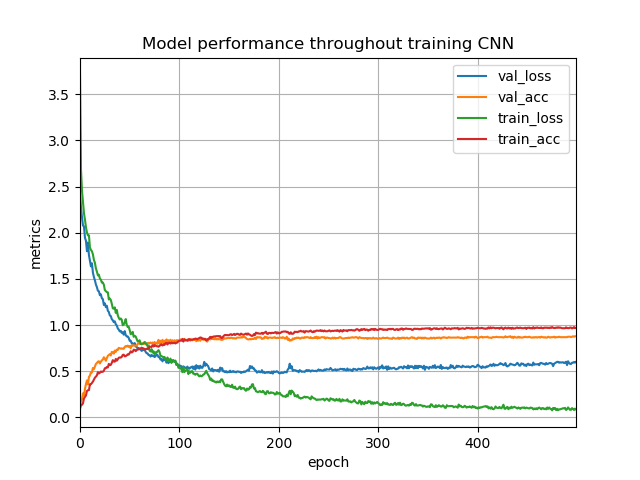

In [27]:
model_mobilenet = tl_model(features_mobilenet)